In [14]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse=pd.read_csv(mouse_drug_data_to_load)
clinical=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_table=pd.merge(mouse, clinical, on="Mouse ID", how="left")

# Display the data table for preview

merge_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [15]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_grouped=merge_table.groupby(["Drug", "Timepoint"])
tumor_average=drug_timepoint_grouped["Tumor Volume (mm3)"].mean()
tumor_average
# Convert to DataFrame
tumor_average=pd.DataFrame(tumor_average)
tumor_average.head()

# Preview DataFrame


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error=drug_timepoint_grouped["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_error=pd.DataFrame(standard_error)
# Preview DataFrame
standard_error.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [18]:
# Minor Data Munging to Re-Format the Data Frames
tumor_average=tumor_average.reset_index()
tumor_average_format=tumor_average.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

standard_error=standard_error.reset_index()
standard_error_format=standard_error.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_average_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [19]:
standard_error_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


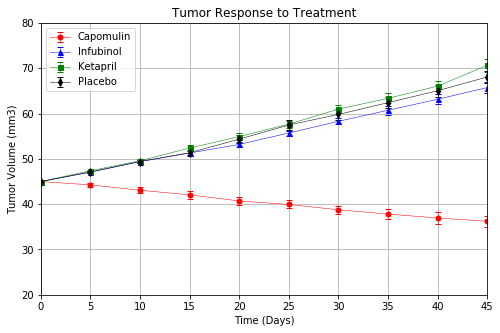

In [27]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))
plt.errorbar(tumor_average_format.index, tumor_average_format["Capomulin"], yerr=standard_error_format["Capomulin"], marker="o", color="r", markersize=5, linewidth=.5, capsize=3)
plt.errorbar(tumor_average_format.index, tumor_average_format["Infubinol"], yerr=standard_error_format["Infubinol"], marker="^", color="b", markersize=5, linewidth=.5, capsize=3)
plt.errorbar(tumor_average_format.index, tumor_average_format["Ketapril"], yerr=standard_error_format["Ketapril"], marker="s", color="g", markersize=5, linewidth=.5, capsize=3)
plt.errorbar(tumor_average_format.index, tumor_average_format["Placebo"], yerr=standard_error_format["Placebo"], marker="d", color="k", markersize=5, linewidth=.5, capsize=3)
# Save the Figure

plt.xlim(0,45)
plt.ylim(20,80)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="best")
# Show the Figure
plt.savefig("plot1.png")
plt.show()

## Metastatic Response to Treatment

In [28]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_average=drug_timepoint_grouped["Metastatic Sites"].mean()

# Convert to DataFrame
metastatic_average=pd.DataFrame(metastatic_average)
# Preview DataFrame
metastatic_average.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [31]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_error=drug_timepoint_grouped["Metastatic Sites"].sem()
# Convert to DataFrame
met_standard_error=pd.DataFrame(met_standard_error)
# Preview DataFrame
met_standard_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [34]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_average=metastatic_average.reset_index()
metastatic_average_format=metastatic_average.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_standard_error=met_standard_error.reset_index()
met_standard_error_format=met_standard_error.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
metastatic_average_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [35]:
met_standard_error_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


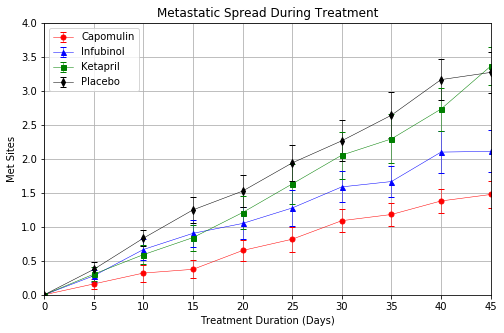

In [38]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))
plt.errorbar(metastatic_average_format.index, metastatic_average_format["Capomulin"], yerr=met_standard_error_format["Capomulin"], marker="o", color="r", markersize=5, linewidth=.5, capsize=3)
plt.errorbar(metastatic_average_format.index, metastatic_average_format["Infubinol"], yerr=met_standard_error_format["Infubinol"], marker="^", color="b", markersize=5, linewidth=.5, capsize=3)
plt.errorbar(metastatic_average_format.index, metastatic_average_format["Ketapril"], yerr=met_standard_error_format["Ketapril"], marker="s", color="g", markersize=5, linewidth=.5, capsize=3)
plt.errorbar(metastatic_average_format.index, metastatic_average_format["Placebo"], yerr=met_standard_error_format["Placebo"], marker="d", color="k", markersize=5, linewidth=.5, capsize=3)
# Save the Figure

plt.xlim(0,45)
plt.ylim(0,4)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.grid()
plt.legend(loc="best")
# Show the Figure
plt.savefig("plot2.png")
plt.show()


## Survival Rates

In [42]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=drug_timepoint_grouped["Mouse ID"].count()
# Convert to DataFrame
mice_count=pd.DataFrame({"Mouse Count":mice_count})
# Preview DataFrame
mice_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [43]:
# Minor Data Munging to Re-Format the Data Frames
mice_count=mice_count.reset_index()
mice_count_format=mice_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview DataFrame
mice_count_format.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


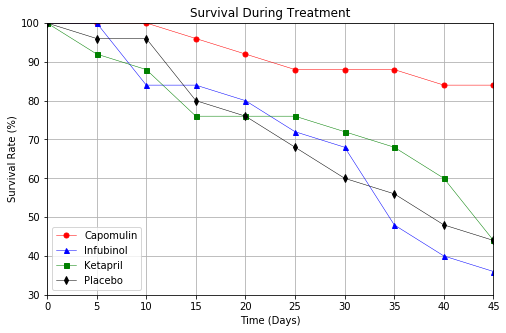

In [53]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(8,5))
plt.plot(100*mice_count_format["Capomulin"]/25, marker="o", color="r", markersize=5, linewidth=.5)
plt.plot(100*mice_count_format["Infubinol"]/25, marker="^", color="b",  markersize=5, linewidth=.5)
plt.plot(100*mice_count_format["Ketapril"]/25, marker="s", color="g",  markersize=5, linewidth=.5)
plt.plot(100*mice_count_format["Placebo"]/25, marker="d", color="k", markersize=5, linewidth=.5)

plt.xlim(0, 45)
plt.ylim(30,100)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(loc="best")
# Show the Figure
plt.savefig("plot3.png")
plt.show()

## Summary Bar Graph

In [55]:
# Calculate the percent changes for each drug
percent_change=100*((tumor_average_format.iloc[-1]-tumor_average_format.iloc[0])/tumor_average_format.iloc[0])
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

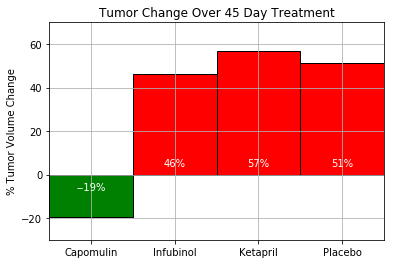

In [69]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple=(percent_change["Capomulin"], percent_change["Infubinol"], percent_change["Ketapril"], percent_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax=plt.subplots()
ind=np.arange(len(percent_change_tuple))
width=1
Pass=ax.bar(ind[0], percent_change_tuple[0], width, color="green", ec="black")
Fail=ax.bar(ind[1:], percent_change_tuple[1:], width, color="red", ec="black")
# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_xlim([-.5, 3.5])
ax.set_ylim([-30, 70])
ax.grid(True)
ax.set_autoscaley_on(False)
# Use functions to label the percentages of changes
def autolabelfail(rects):
    for rect in rects:
            height=rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2, 3,
                   "%d%%" % int(height),
                   ha="center", va="bottom", color="white")
            
def autolabelpass(rects):
    for rect in rects:
            height=rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2, -8,
                   "-%d%%" % int(height),
                   ha="center", va="bottom", color="white")

# Call functions to implement the function calls
autolabelpass(Pass)
autolabelfail(Fail)

# Save the Figure

plt.savefig("plot4.png")
# Show the Figure
fig.show()

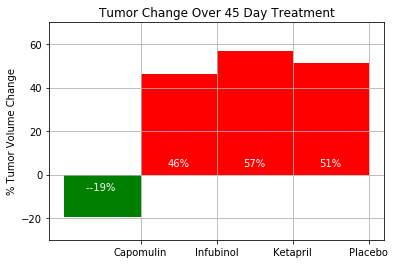